In [1]:
# Global imports and settings
%matplotlib inline
from preamble import *
plt.rcParams['figure.dpi'] = 100 # Use 300 for PDF, 100 for slides
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

# Lecture 1: Introduction to Machine Learning
Joaquin Vanschoren, Eindhoven University of Technology

## Artificial Intelligence
1950s: Can computers be made to 'think'?
- automate intellectual tasks normally performed by humans
- encompasses learning, but also many other tasks (e.g. logic, planning,...)
- _symbolic AI_: programmed rules/algorithms for manipulating knowledge
    - Great for well-defined problems: chess, expert systems,...
    - Pervasively used today (e.g. chip design)
    - Hard for complex, fuzzy problems (e.g. images, text)

## Machine Learning
Are computers capable of learning and originality? Alan Turing: Yes!
- Learn to perform a task T given experience (examples) E, always improving according to some metric M
- New programming paradigm
    - System is _trained_ rather than explictly programmed
    - _Generalizes_ from examples to find rules (models) to act/predict
- As more data becomes available, more ambitious problems can be tackled

<img src="../images/00_ML.png" alt="ml" style="width: 500px;"/>

### Machine learning vs Statistics
* Both aim to make predictions of natural phenomena:
<img src="../images/00_stat1.png" alt="ml" style="width: 200px;"/>
* Statistics:
    - Help humans understand the world
    - Parametric: assume data is generated according to parametric model
<img src="../images/00_stat2.png" alt="ml" style="width: 200px;"/>
* Machine learning:
    - Automate a task entirely (partially _replace_ the human)
    - Assume that data generation process is unknown
    - Engineering-oriented, less (too little?) mathematical theory
<img src="../images/00_stat3.png" alt="ml" style="width: 200px;"/>
See Breiman (2001): Statistical modelling: The two cultures

### Machine Learning success stories
- Search engines (e.g. Google)
- Recommender systems (e.g. Netflix)
- Automatic translation (e.g. Google Translate)
- Speech understanding (e.g. Siri, Alexa)
- Game playing (e.g. AlphaGo)
- Self-driving cars
- Personalized medicine
- Progress in all sciences: Genetics, astronomy, chemistry, neurology, physics,..

# Types of machine learning
- __Supervised Learning__: learn a _model_ from labeled _training data_ (ground truth)
    - Given a new input _X_, predict the right output _y_
    - Given images of cats and dogs, predict whether a new image is a cat or a dog
- __Unsupervised Learning__: explore the structure of the data to extract meaningful information
    - Given inputs _X_, find which ones are special, similar, anomalous, ...
- __Semi-Supervised Learning__: learn a model from (few) labeled and (many) unlabeled examples
    - Unlabeled examples add information about which new examples are likely to occur
- __Reinforcement Learning__: develop an agent that improves its performance based on interactions with the environment 

Note: Practical ML systems can combine many types in one system.

## Supervised Machine Learning

- Learn a model from labeled training data, then make predictions
- Supervised: we know the correct/desired outcome (label)
- Subtypes: _classification_ (predict a class) and _regression_ (predict a numeric value)
- Most supervised algorithms that we will see can do both

<img src="../images/01_supervised.png" alt="ml" style="width: 60%;"/>

### Classification

- Predict a _class label_ (category), discrete and unordered
    - Can be _binary_ (e.g. spam/not spam) or _multi-class_ (e.g. letter recognition)
    - Many classifiers can return a _confidence_ per class
- The predictions of the model yield a _decision boundary_ separating the classes

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# create a synthetic dataset
X, y = make_blobs(centers=2, cluster_std=2.5, random_state=8)

# Train classifiers
lr = LogisticRegression().fit(X, y)
svm = SVC(kernel='rbf', probability=True).fit(X, y)
knn = KNeighborsClassifier(n_neighbors=3).fit(X, y)

# Plotting
@interact
def plot_classifier(classifier=[lr,svm,knn]):
    fig, axes = plt.subplots(1, 2, figsize=(13, 5))    
    mglearn.tools.plot_2d_separator(
        classifier, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
    scores_image = mglearn.tools.plot_2d_scores(
        classifier, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')
    for ax in axes:
        mglearn.discrete_scatter(X[:, 0], X[:, 1], y,
                                 markers='o', ax=ax)
        ax.set_xlabel("Feature 0")
        ax.set_ylabel("Feature 1")
    cbar = plt.colorbar(scores_image, ax=axes.tolist())
    cbar.set_label('Predicted probability', rotation=270, labelpad=15)
    cbar.set_alpha(1)
    cbar.draw_all() 
    axes[0].legend(["Class 0", "Class 1"], ncol=4, loc=(.1, 1.1));

interactive(children=(Dropdown(description='classifier', options=(LogisticRegression(C=1.0, class_weight=None,…

#### Example: Flower classification
Classify types of Iris flowers (setosa, versicolor, or virginica)

<img src="../images/01_iris.jpeg" alt="ml" style="width: 75%;"/>


#### Representation: input features and labels
- Dataset can have any number of input features (variables)
    - Every example is a point in a (possibly high-dimensional) space
    
<img src="../images/01_terminology.png" alt="ml" style="float: left; width: 50%;"/>
<img src="../images/01_iris3d.png" alt="ml" style="float: left; width: 35%;"/>

### Regression
- Predict a continuous value, e.g. temperature
    - Target variable is numeric
    - Some algorithms can return a _confidence interval_
- Find the relationship between predictors and the target.
    - E.g. relationship between hours studied and final grade

In [45]:
from mglearn.datasets import make_wave
from mglearn.plot_helpers import cm2
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

X, y = make_wave(n_samples=60)
x = np.atleast_2d(np.linspace(-3, 3, 100)).T
lr = LinearRegression().fit(X, y)
ridge = BayesianRidge().fit(X, y)
gp = GaussianProcessRegressor(kernel=RBF(10, (1e-2, 1e2)), n_restarts_optimizer=9, alpha=0.1, normalize_y=True).fit(X, y)

@interact
def plot_regression(regressor=[lr, ridge, gp]):
    line = np.linspace(-3, 3, 100).reshape(-1, 1)
    plt.figure(figsize=(8, 8))
    plt.plot(X, y, 'o', c=cm2(0))
    if(regressor.__class__.__name__ == 'LinearRegression'):
        y_pred = regressor.predict(x)
    else:
        y_pred, sigma = regressor.predict(x, return_std=True)
        plt.fill(np.concatenate([x, x[::-1]]),
             np.concatenate([y_pred - 1.9600 * sigma,
                            (y_pred + 1.9600 * sigma)[::-1]]),
             alpha=.5, fc='b', ec='None', label='95% confidence interval')
        
    plt.plot(line, y_pred, 'b-')
    plt.xlabel("Input feature 1")
    plt.ylabel("Target")

interactive(children=(Dropdown(description='regressor', options=(LinearRegression(copy_X=True, fit_intercept=T…

## Unsupervised Machine Learning

- Unlabeled data, or data with unknown structure
- Explore the structure of the data to extract information
- Many types, we'll just discuss two.

### Clustering

- Organize information into meaningful subgroups (clusters)
- Objects in cluster share certain degree of similarity (and dissimilarity to other clusters)
- Example: distinguish different types of customers

In [46]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_samples = 1500

@interact
def plot_clusters(randomize=(1,100,1)):
    # Generate data
    X, y = make_blobs(n_samples=n_samples, cluster_std=[1.0, 1.5, 0.5], random_state=randomize)
    # Cluster
    y_pred = KMeans(n_clusters=3, random_state=randomize).fit_predict(X)
    # PLot
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.title("Clusters")
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")


interactive(children=(IntSlider(value=50, description='randomize', min=1), Output()), _dom_classes=('widget-in…

### Dimensionality reduction

- Data can be very high-dimensional and difficult to understand, learn from, store,...
- Dimensionality reduction can compress the data into fewer dimensions, while retaining most of the information
- Contrary to feature selection, the new features lose their (original) meaning
- The new representation can be a lot easier to model (and visualize)

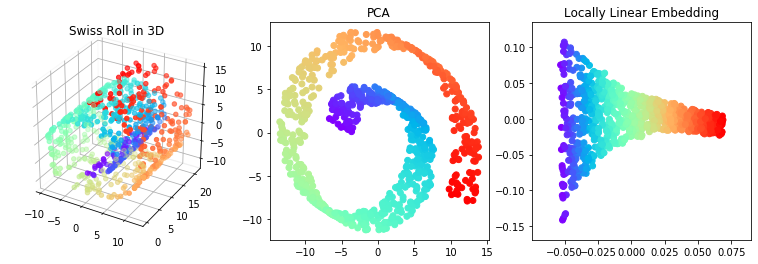

In [5]:
from sklearn.datasets.samples_generator import make_swiss_roll
from sklearn.manifold import locally_linear_embedding
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

X, color = make_swiss_roll(n_samples=800, random_state=123)

fig = plt.figure(figsize=plt.figaspect(0.3))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow)
plt.title('Swiss Roll in 3D')

ax2 = fig.add_subplot(1, 3, 2)
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
plt.scatter(X_spca[:, 0], X_spca[:, 1], c=color, cmap=plt.cm.rainbow)
plt.title('PCA');

ax3 = fig.add_subplot(1, 3, 3)
X_lle, err = locally_linear_embedding(X, n_neighbors=12, n_components=2)
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.rainbow)
plt.title('Locally Linear Embedding');

## Reinforcement learning

- Develop an agent that improves its performance based on interactions with the environment
    - Example: games like Chess, Go,...
- Search a (large) space of actions and states
- _Reward function_ defines how well a (series of) actions works
- Learn a series of actions (policy) that maximizes reward through exploration

<img src="../images/01_rl2.png" alt="ml" style="width: 60%;"/>


# Learning = Representation + evaluation + optimization
All machine learning algorithms consist of 3 components:
- **Representation**: A model must be represented in a formal language that the computer can handle
    - Defines the 'concepts' it can learn, the _hypothesis space_
    - E.g. a decision tree, neural network, set of annotated data points
- **Evaluation**: An _internal_ way to choose one hypothesis over the other
    - Objective function, scoring function, loss function
    - E.g. Difference between correct output and predictions
- **Optimization**: An _efficient_ way to search the hypothesis space
    - Start from simple hypothesis, extend (relax) if it doesn't fit the data
    - Defines speed of learning, number of optima,...
    - E.g. Gradient descent
    
A powerful/flexible model is only useful if it can also be optimized efficiently

### Example: neural networks
* Representation: (layered) neural network
    * Each connection has a _weight_ (a.k.a. model parameters)
    * Each node receives the weighted input values and emits a new value
* The _hypothesis space_ consists of the set of all weights
* The architecture, type of neurons, etc. are fixed
    * We call these _hyper-parameters_ (set by user, fixed during training)
    * They can also be learned (in an outer loop)

<img src="../images/08_nn_basic_arch.png" alt="ml" style="float: left; width: 40%;"/>
    


### Example: neural networks
* Representation: For illustration, consider the space of 2 model parameters
* Evaluation: A _loss function_ computes, for each set of parameters, how good the predictions are
    * _Estimated_ on a set of training data with the 'correct' predictions
    * We can't see the full surface, only evaluate specific sets of parameters
* Optimization: Find the optimal set of parameters
    * Usually a type of _search_ in the hypothesis space
    * Given a few initial evaluations, predict which parameters may be better

<img src="../images/00_ml3.png" alt="ml" style="float: left; width: 90%;"/>

# Generalization, Overfitting and Underfitting
* We _hope_ that the model can _generalize_ from the training data: make accurate predictions on unseen data.
* We can never be sure, only hope that we make the right assumptions.
    * We typically assume that new data will be similar to previous data
    * _Inductive bias_: assumptions that we put into the algorithm (everything except the training data itself)

#### Example: Dating 
<img src="../images/00_dating.png" alt="ml" style="width: 80%;"/>

- Can you find a simple rule that works? Is one better than others?
- What can we assume about the future? Nothing?
- What if there is noise / errors?
- What if there are factor you don't know about?

## Overfitting and Underfitting
* It's easy to build a complex model that is 100% accurate on the training data, but very bad on new data
* Overfitting: building a model that is _too complex for the amount of data_ that we have
    * You model peculiarities in your training data (noise, biases,...)
    * Solve by making model simpler (regularization), or getting more data
    * **Most algorithms have hyperparameters that allow regularization**
* Underfitting: building a model that is _too simple given the complexity of the data_
    * Use a more complex model
* There are techniques for detecting overfitting (e.g. bias-variance analysis). More about that later
* You can build _ensembles_ of many models to overcome both underfitting and overfitting 

* There is often a sweet spot that you need to find by optimizing the choice of algorithms and hyperparameters, or using more data.  
* Example: regression using polynomial functions

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
X_test = np.linspace(0, 1, 100)
scores_x, scores_y = [], []

@interact
def plot_poly(degrees = (1, 16, 1)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))    
    polynomial_features = PolynomialFeatures(degree=degrees,
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    ax1.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    ax1.plot(X_test, true_fun(X_test), label="True function")
    ax1.scatter(X, y, edgecolor='b', s=20, label="Samples")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_xlim((0, 1))
    ax1.set_ylim((-2, 2))
    ax1.legend(loc="best")
    ax1.set_title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees, -scores.mean(), scores.std()))
    scores_x.append(degrees)
    scores_y.append(-scores.mean())

    # Plot scores
    ax2.scatter(scores_x, scores_y, edgecolor='b', s=20)
    order = np.argsort(scores_x)
    ax2.plot(np.array(scores_x)[order], np.array(scores_y)[order])
    ax2.set_xlim((0, 16))
    ax2.set_ylim((10**-2, 10**11))
    ax2.set_xlabel("degree")
    ax2.set_ylabel("error")
    ax2.set_yscale("log")
    
    fig.show()

interactive(children=(IntSlider(value=8, description='degrees', max=16, min=1), Output()), _dom_classes=('widg…

## Model selection
- Next to the (internal) loss function, we need an (external) evaluation function
    - Feedback signal: are we actually learning the right thing? 
    - Are we under/overfitting?
    - More freely chosen to fit the application. Loss functions have constraints (e.g. differentiable)
    - Needed to choose between algorithms (or different hyper-parameter settings)

- Data needs to be split into _training_ and _test_ sets
    - Optimize model parameters on the training set, evaluate on independent test set
    - To optimize hyperparameters as well, set aside part of training set as a _validation_ set

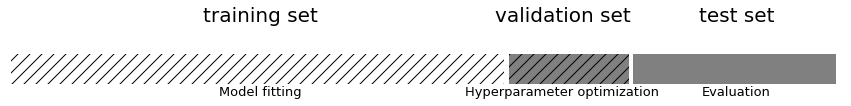

In [7]:
import mglearn
mglearn.plots.plot_threefold_split()

Overview

<img src="../images/00_hyperparams.png" alt="ml" style="width: 50%;"/>

## Only generalization counts!
* Never evaluate your final models on the training data, except for:
    * Tracking whether the optimizer converges (learning curves)
    * Detecting under/overfitting:
        * Low training and test score: underfitting
        * High training score, low test score: overfitting
* Always keep a completely independent test set
* Avoid data leakage:
    * Never optimize hyperparameter settings on the test data
    * Never choose preprocessing techniques based on the test data
* On small datasets, use multiple train-test splits to avoid bias
    * E.g. Use cross-validation (see later)

# Data (problem) representation    
- Algorithm needs to correctly transform the inputs to the right outputs
- A lot depends on how we present the data to the algorithm
    - Transform the data to a more useful representation (a.k.a. _encoding_ or _embedding_)
    - Can be done end-to-end (e.g. deep learning) or by first 'preprocessing' the data
<img src="../images/00_representation.png" alt="ml" style="width: 800px;"/>

## Feature engineering
* Most machine learning techniques require humans to build a good representation of the data  
    * Sometimes data is naturally structured (e.g. medical tests)
* Nothing beats domain knowledge (when available) to get a good representation
    * E.g. Iris data: leaf length/width separate the classes well
* Feature engineering is often necessary to get the best results
    * Feature selection, dimensionality reduction, scaling, ...
    
<img src="../images/01_iris3d.png" alt="ml" style="width: 35%;"/>

## Learning data transformations end-to-end
* For unstructured data (e.g. images, text), it's hard to extract good features
* Deep learning: learn your own representation (embedding) of the data 
    * Through multiple layers of representation (e.g. layers of neurons)
    * Each layer transforms the data a bit, based on what reduces the error
    
<img src="../images/00_layers.png" alt="ml" style="width: 60%"/>

#### Example: digit classification
- Input pixels go in, each layer transforms them to an increasingly informative representation for the given task
- Often less intuitive for humans
<img src="../images/00_layers2.png" alt="ml" style="width: 60%"/>

## Curse of dimensionality
* Intuition fails in high dimensions: 
    - Randomly sample points in an n-dimensional space (e.g. a unit hypercube)
    - The more dimensions you have, the more sparse the space becomes
    - Distances between any two points will become almost identical
    - Almost all points become outliers at the edge of the space

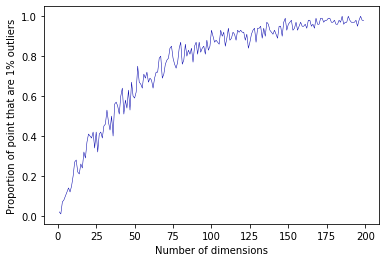

In [8]:
# Code originally by Peter Norvig 
def sample(d=2, N=100):
    return [[np.random.uniform(0., 1.) for i in range(d)] for _ in range(N)]

def corner_count(points):
    return np.mean([any([(d < .01 or d > .99) for d in p]) for p in points])

def go(Ds=range(1,200)):
    plt.plot(Ds, [corner_count(sample(d)) for d in Ds])
    plt.xlabel("Number of dimensions")
    plt.ylabel("Proportion of point that are 1% outliers")
    
go()

#### Practical consequences
* For every dimension (feature) you add, you need exponentially more data to avoid sparseness
* Affects any algorithm that is based on distances (e.g. kNN, SVM, kernel-based methods, tree-based methods,...)
* Blessing of non-uniformity: on many applications, the data lives in a very small subspace
* You can drastically improve performance by selecting features or using lower-dimensional data representations

## More data can beat a cleverer algorithm (but you need both)
* More data reduces the chance of overfitting
* Less sparse data reduces the curse of dimensionality
* _Non-parametric_ models: number of model parameters grows with the amount of data
    - Tree-based techniques, k-Nearest neighbors, SVM,...
    - They can learn any model given sufficient data (but can get stuck in local minima)
* _Parametric_ (fixed size) models: fixed number of model parameters
    - Linear models, Neural networks,...
    - Can be given a huge number of parameters to benefit from more data 
    - Deep learning models can have millions of weights, learn almost any function.
* The bottleneck is moving from data to compute/scalability

# Building machine learning systems
A typical machine learning system has multiple components:
    
- Preprocessing: Raw data is rarely ideal for learning
    - Feature scaling: bring values in same range
    - Encoding: make categorical features numeric
    - Discretization: make numeric features categorical
    - Label imbalance correction (e.g. downsampling)
    - Feature selection: remove uninteresting/correlated features
    - Dimensionality reduction can also make data easier to learn
    - Using pre-learned embeddings (e.g. word-to-vector, image-to-vector)
    

- Learning and evaluation
    - Every algorithm has its own biases
    - No single algorithm is always best
    - _Model selection_ compares and selects the best models
        - Different algorithms, different hyperparameter settings
    - Split data in training, validation, and test sets
    
- Prediction
    - Final optimized model can be used for prediction
    - Expected performance is performance measured on _independent_ test set

- Together they form a _workflow_ of _pipeline_
- You need to optimize pipelines continuously
    - _Concept drift_: the phenomenon you are modelling can change over time
    - _Feedback_: your model's predictions may change future data 

<img src="../images/01_ml_systems_2.png" alt="ml" style="width: 80%"/>

# Lecture 2: Linear models
Joaquin Vanschoren, Eindhoven University of Technology

## The Mathematics behind Machine Learning
* To understand machine learning algorithms, it often helps to describe them mathematically.
* To avoid confusion, let's specify a precise notation

### Basic notation
* A _scalar_ is a simple numeric value, denoted by italic letter: $x=3.24$
* A _vector_ is a 1D ordered array of _n_ scalars, denoted by bold letter: $\mathbf{x}=[3.24, 1.2]$
    * A vector can represent a _point_ in an n-dimensional space, given a _basis_.
    * $x_i$ denotes the $i$th element of a vector, thus $x_0 = 3.24$.
        * Note: some other courses use $x^{(i)}$ notation
* A _set_ is an _unordered_ collection of unique elements, denote by caligraphic capital: $\mathcal{S}=\{3.24, 1.2\}$
* A _matrix_ is a 2D array of scalars, denoted by bold capital: $\mathbf{X}=\begin{bmatrix}
3.24 & 1.2 \\
2.24 & 0.2 
\end{bmatrix}$
    * It can represent a set of points in an n-dimensional space, given a _basis_.
    * $\textbf{X}_{i}$ denotes the $i$th _row_ of the matrix
    * $\textbf{X}_{i,j}$ denotes the _element_ in the $i$th row, $j$th column, thus $\mathbf{X}_{0,1} = 2.24$
* The _standard basis_ for a Euclidean space is the set of unit vectors
    * Data can also be represented in a non-standard basis (e.g. polynomials) if useful 

* A _tensor_ is an _k_-dimensional array of data, denoted by an italic capital: $T$
    * _k_ is also called the _order_, _degree_, or _rank_
    * $T_{i,j,k,...}$ denotes the element or sub-tensor in the corresponding position
    * A set of color images can be represented by:
        * a 4D tensor (sample x height x weight x color channel)
        * a 2D tensor (sample x flattened vector of pixel values)
    
<img src="../images/08_images.png" alt="ml" style="width: 40%;"/>

### Basic operations
* Sums and products are denoted by capital Sigma and capital Pi:
$$\sum_{i=0}^{n} = x_0 + x_1 + ... + x_p \quad \prod_{i=0}^{n} = x_0 \cdot x_1 \cdot ... \cdot x_p$$
* Operations on vectors are _element-wise_: e.g. $\mathbf{x}+\mathbf{z} = [x_0+z_0,x_1+z_1, ... , x_p+z_p]$
* Dot product $\mathbf{w}\mathbf{x} = \mathbf{w} \cdot \mathbf{x} = \sum_{i=0}^{p} w_i \cdot x_i = w_0 \cdot x_0 + w_1 \cdot x_1 + ... + w_p \cdot x_p$
* Matrix product $\mathbf{W}\mathbf{x} = \begin{bmatrix}
\mathbf{w_0} \cdot \mathbf{x} \\
... \\
\mathbf{w_p} \cdot \mathbf{x} \end{bmatrix}$
* A function $f(x) = y$ relates an input element $x$ to an output $y$
    * It has a _local minimum_ at $x=c$ if $f(x) \geq f(c)$ in interval $(c-\epsilon, c+\epsilon)$
    * It has a _global minimum_ at $x=c$ if $f(x) \geq f(c)$ for any value for $x$
* A vector function consumes an input and produces a vector: $\mathbf{f}(\mathbf{x}) = \mathbf{y}$
* $\underset{x\in X}{\operatorname{max}}f(x)$ returns the highest value f(x) for any x
* $\underset{c\in C}{\operatorname{argmax}}f(x)$ returns the element c that maximizes f(c)

### Gradients
* A _derivative_ $f'$ of a function $f$ describes how fast $f$ grows or decreases
* The process of finding a derivative is called differentiation
    * Derivatives for basic functions are known
    * For non-basic functions we use the _chain rule_: $F(x) = f(g(x)) \rightarrow F'(x)=f'(g(x))g'(x)$
* A function is _differentiable_ if it has a derivate in any point of it's domain
    * It's _continuously differentiable_ if $f'$ is itself a function
    * It's _smooth_ if $f', f'', f''', ...$ all exist
* A _gradient_ $\nabla f$ is the derivate of a function in multiple dimensions
    * It is a vector of _partial derivatives_: $\nabla f = \left[ \frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1},... \right]$
    * E.g. $f=2x_0+3x_1^{2}-\sin(x_2) \rightarrow \nabla f= [2, 6x_1, -cos(x_2)]$

### Probabilities
* A random variable $X$ can be continuous or discrete
* A probability distribution of a discrete variable is the list of probabilities for each possible value
    * Also called the _probability mass function_ (_pmf_)
    * The _expectation_ (or _mean_) $\mathbb{E}[X] = \mu_X = \sum_{i=1}^k[x_i \cdot Pr(X=x_i)]$
    * The standard deviation $\sigma = \sqrt{\mathbb{E}[(X-\mu)^2]}$ and variance $var(X) = \sigma^2$
* A probability distribution $f_X$ of a continuous variable $X$ is described by a _probability density function_ (_pdf_)
    * The _expectation_ is given by $\mathbb{E}[X] = \int_{\mathbb{R}} x f_X(x) dx$
   
<img src="../images/02_pdf.png" alt="ml" style="width: 50%;"/>

# Linear models
Linear models make a prediction using a linear function of the input features. Can be very powerful for or datasets with many features. 

If you have more features than training data points, any target y can be perfectly modeled (on the training set) as a linear function.

## Linear models for regression
Prediction formula for input features x. $w_i$ and b are the _model parameters_ that need to be learned.  

$$\hat{y} = \mathbf{w}\mathbf{x} + b = \sum_{i=0}^{p} w_i \cdot x_i + b = w_0 \cdot x_0 + w_1 \cdot x_1 + ... + w_p \cdot x_p + b $$

There are many different algorithms, differing in how w and b are learned from the training data.

w[0]: 0.393906  b: -0.031804


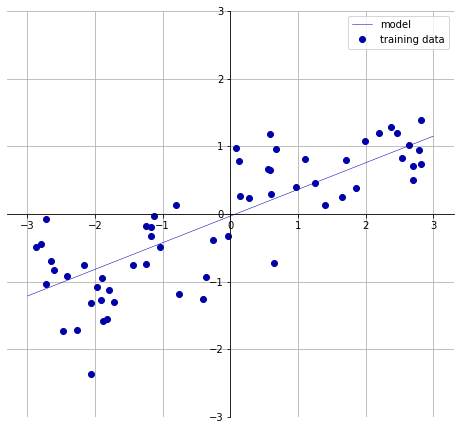

In [9]:
mglearn.plots.plot_linear_regression_wave()

### Linear Regression aka Ordinary Least Squares
* Finds the parameters w and b that minimize the _mean squared error_ between predictions (red) and the true regression targets (blue), y, on the training set. 
    * MSE: Sum of the squared differences (residuals) between the predictions $\hat{y_i}$ and the true values $y_i$.
$$\mathcal{L}_{MSE} = \sum_{n=0}^{N} (y_n-\hat{y_n})^2 = \sum_{n=0}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + b))^2$$ 

<img src="../images/02_least_squares.png" alt="ml" style="width: 550px;"/>

#### Solving ordinary least squares
* Convex optimization problem with unique closed-form solution (if you have more data points than model parameters w)
* It has no hyperparameters, thus model complexity cannot be controlled.

Linear regression can be found in `sklearn.linear_model`. We'll evaluate it on the Boston Housing dataset.

``` python
lr = LinearRegression().fit(X_train, y_train)
```

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [11]:
print("Weights (coefficients): {}".format(lr.coef_[0:40]))
print("Bias (intercept): {}".format(lr.intercept_))

Weights (coefficients): [ -412.711   -52.243  -131.899   -12.004   -15.511    28.716    54.704
   -49.535    26.582    37.062   -11.828   -18.058   -19.525    12.203
  2980.781  1500.843   114.187   -16.97     40.961   -24.264    57.616
  1278.121 -2239.869   222.825    -2.182    42.996   -13.398   -19.389
    -2.575   -81.013     9.66      4.914    -0.812    -7.647    33.784
   -11.446    68.508   -17.375    42.813     1.14 ]
Bias (intercept): 30.934563673645666


In [12]:
print("Training set score (R^2): {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score (R^2): {:.2f}".format(lr.score(X_test, y_test)))

Training set score (R^2): 0.95
Test set score (R^2): 0.61


### Ridge regression
* Same formula as linear regression
* Adds a penalty term to the least squares sum:

$$\mathcal{L}_{Ridge} = \sum_{n=0}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + b))^2 + \alpha \sum_{i=0}^{p} w_i^2$$ 

* Requires that the coefficients (w) are close to zero.
    * Each feature should have as little effect on the outcome as possible 
* Regularization: explicitly restrict a model to avoid overfitting. 
* Type of L2 regularization: prefers many small weights
    * L1 regularization prefers sparsity: many weights to be 0, others large

`Ridge` can also be found in `sklearn.linear_model`.  
`ridge = Ridge().fit(X_train, y_train)`

In [13]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


Test set score is higher and training set score lower: less overfitting!

The strength of the regularization can be controlled with the `alpha` parameter. Default is 1.0.
* Increasing alpha forces coefficients to move more toward zero (more regularization)
* Decreasing alpha allows the coefficients to be less restricted (less regularization)

We can plot the weight values for differents levels of regularization. Move the slider to increase/decrease regularization. Increasing regularization decreases the values of the coefficients, but never to 0.

In [14]:
from __future__ import print_function
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from sklearn.linear_model import Ridge

X, y = mglearn.datasets.load_extended_boston()
X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(X, y, random_state=0)

@interact
def plot_ridge(alpha=(0,10.0,0.05)):
    r = Ridge(alpha=alpha).fit(X_B_train, y_B_train)
    fig, ax = plt.subplots(figsize=(8,2))
    ax.plot(r.coef_, 'o')
    ax.set_title("alpha {}, score {:.2f} (training score {:.2f})".format(alpha, r.score(X_B_test, y_B_test), r.score(X_B_train, y_B_train)))
    ax.set_xlabel("Coefficient index")
    ax.set_ylabel("Coefficient magnitude")
    ax.hlines(0, 0, len(r.coef_))
    ax.set_ylim(-25, 25)
    ax.set_xlim(0, 50);

interactive(children=(FloatSlider(value=5.0, description='alpha', max=10.0, step=0.05), Output()), _dom_classe…

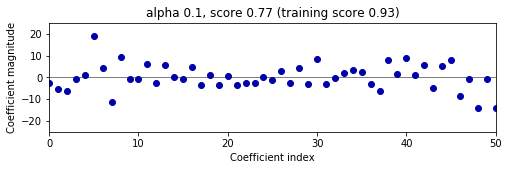

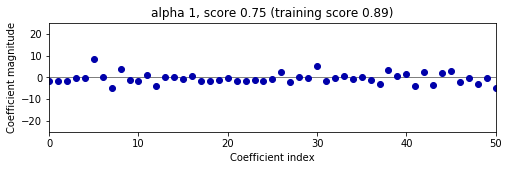

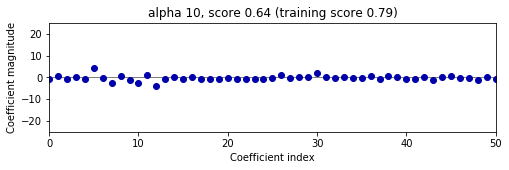

In [15]:
for alpha in [0.1, 1, 10]:
    plot_ridge(alpha)

Another way to understand the influence of regularization is to fix a value of alpha but vary the amount of training data available. With enough training data, regularization becomes less important: ridge and linear regression will have the same performance.

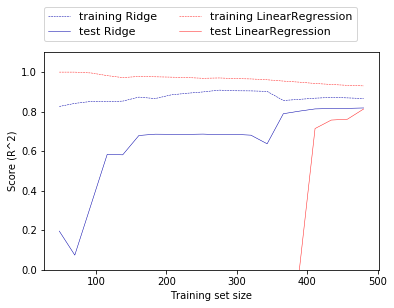

In [16]:
mglearn.plots.plot_ridge_n_samples()

### Lasso (Least Absolute Shrinkage and Selection Operator)
* Another form of regularization
* Adds a penalty term to the least squares sum:
$$\mathcal{L}_{Lasso} = \sum_{n=0}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + b))^2 + \alpha \sum_{i=0}^{p} |w_i|$$ 
* Prefers coefficients to be exactly zero (L1 regularization).
* Some features are entirely ignored by the model: automatic feature selection.
* Same parameter `alpha` to control the strength of regularization. 
* Convex, but no longer strictly convex (and NOT differentiable). Weights can be optimized using (for instance) _coordinate descent_
* New parameter `max_iter`: the maximum number of coordinate descent iterations
    * Should be higher for small values of `alpha`

### Gradient Descent
* Start with a random set of p weights values $\mathbf{w}^0$
* Compute the derivative of the objective function $\mathcal{L}$ (e.g. $\mathcal{L_{Ridge}}$) and use it to find the slope (in p dimensions)
* Update all weights slightly (step size $\gamma$) in the direction of the downhill slope. For step s:
$$\mathbf{w}^{s+1} = \mathbf{w}^s-\gamma\nabla \mathcal{L}(\mathbf{w}^s)$$

* Repeat for `max_iter` iterations
* Visualization in 1 dimension (for 1 weight):
<img src="../images/01_gradient_descent.jpg" alt="ml" style="width: 500px;"/>

### Gradient Descent
In two dimensions:
<img src="../images/01_gradient_descent_2D.png" alt="ml" style="width: 700px;"/>


### Gradient Descent
* Intuition: walking downhill using only the slope you "feel" nearby

<img src="../images/01_gradient_descent_hill.png" alt="ml" style="width: 600px;"/>

### Coordinate descent
- Variation of gradient descent, also applicable for non-differentiable loss functions
- Faster iterations, may converge more slowly
- In every iteration, optimizes a single coordinate $w_i$, using a coordinate selection rule (e.g. round robin)

<img src="../images/02_cd.png" alt="ml" style="width: 400px;"/>

- If $\mathcal{L}$ is differentiable, the update rule is based on the partial derivative: $w_i^{s+1} = w_i^{s} − \gamma \frac{\partial \mathcal{L}}{\partial w_i}$
- If $\mathcal{L}$ is not differentiable but convex, the [_subgradient_](https://www.cs.cmu.edu/~ggordon/10725-F12/slides/06-sg-method.pdf) can be computed. 
- For Lasso, the [resulting update rule](https://xavierbourretsicotte.github.io/lasso_derivation.html) includes the _soft thresholding operator S_: $w_i^{s+1} \cong S(f(w_i^{s}),\alpha)$
    - _S_ sets $w_i$'s to 0 when they are sufficiently small ('sufficiently' is defined by $\alpha$)


We can again analyse what happens to the weights. Increasing regularization under L1 leads to many coefficients becoming exactly 0.

In [17]:
from sklearn.linear_model import Lasso

@interact
def plot_lasso(alpha=(0,0.5,0.005)):
    r = Lasso(alpha=alpha).fit(X_B_train, y_B_train)
    fig, ax = plt.subplots(figsize=(8,2))
    ax.plot(r.coef_, 'o')
    ax.set_title("alpha {}, score {:.2f} (training score {:.2f})".format(alpha, r.score(X_B_test, y_B_test), r.score(X_B_train, y_B_train)))
    ax.set_xlabel("Coefficient index")
    ax.set_ylabel("Coefficient magnitude")
    ax.hlines(0, 0, len(r.coef_))
    ax.set_ylim(-25, 25);
    ax.set_xlim(0, 50);

interactive(children=(FloatSlider(value=0.25, description='alpha', max=0.5, step=0.005), Output()), _dom_class…

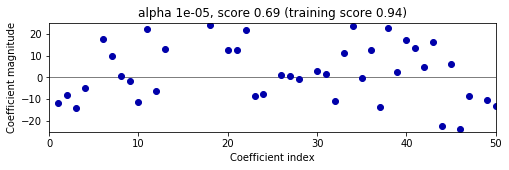

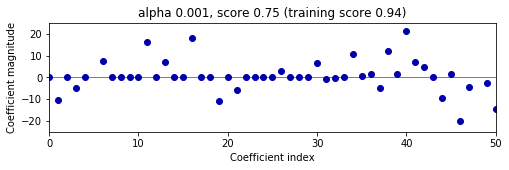

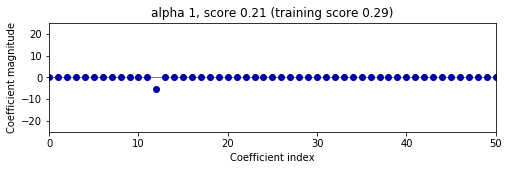

In [18]:
for alpha in [0.00001, 0.001, 1]:
    plot_lasso(alpha)

## Interpreting L1 and L2 loss
- Red ellipses are the contours of the least squares error function
- In blue are the constraints imposed by the L1 (left) and L2 (right) loss
- For L1, the likelihood of hitting the objective with the corners is higher
    - Weights of other coefficients are 0, hence sparse representations
- For L2, it could intersect at any point, hence non-zero weights
- From _Elements of Statistical Learning_:

![L1 and L2 loss](../images/02_lossfunctions.png)

#### Linear models for Classification
Aims to find a (hyper)plane that separates the examples of each class.  
For binary classification (2 classes), we aim to fit the following function: 

$\hat{y} = w_0 * x_0 + w_1 * x_1 + ... + w_p * x_p + b > 0$  
    
When $\hat{y}<0$, predict class -1, otherwise predict class +1

There are many algorithms for learning linear classification models, differing in:

* Loss function: evaluate how well the linear model fits the training data
* Regularization techniques

Most common techniques:

* Logistic regression: 
    * `sklearn.linear_model.LogisticRegression`
* Linear Support Vector Machine: 
    * `sklearn.svm.LinearSVC`


##### Logistic regression
The logistic model uses the _logistic_ (or _sigmoid_) function to estimate the probability that a given sample belongs to class 1:
$$ z = f(x) = w_0 * x_0 + w_1 * x_1 + ... + w_p * x_p $$
$$ \hat{y} = Pr[1|x_1,...,x_k] = g(z) = \frac{1}{1+e^{-z}} $$
![LogisticRegression image](../images/01_logistic.png)

[Source](https://florianhartl.com/logistic-regression-geometric-intuition.html)

On 2-dimensional data: 
![LogisticRegression image](../images/02_logistic2d.png)

* The logistic function is chosen because it maps values (-Inf,Inf) to a probability [0,1]
* We add a new dimension for the dependent variable $\text{y}$ and fit the logistic function g(z) so that it separates the samples as good as possible. The positive (blue) points are mapped to 1 and the negative (red) points to 0.
* After fitting, the logistic function provides the probability that a new point is positive. If we need a binary prediction, we can threshold at 0.5.
* There are different ways to find the optimal parameters w that fit the training data best

###### Fitting (solving): cross-entropy
* We define the difference (error) between the actual probabilies (frequencies) $p_i$ and the predicted probabilities $q_i$ is the cross-entropy $H(p,q)$:
$$ H(p,q) = - \sum_{i} p_i log(q_i) $$
* Note: Instead of minimizing cross-entropy $H(p,q)$, you can maximize _log-likelihood_ $-H(p,q)$, and hence this is also called _maximum likelihood_ estimation
* In binary classification, $i=0,1$ and $p_1=y$, $p_0=1-y$, $q_1=\hat{y}$, $q_0=1-\hat{y}$
* And thus:
$$ H(p,q) = - y log(\hat{y}) - (1-y) log(1-\hat{y})$$

###### Fitting (solving): cross-entropy loss
* Loss function: the average of all cross-entropies in the sample (of $N$ data points):
$$\mathcal{L_{log}}(\mathbf{w}) = \sum_{n=1}^{N} H(p_n,q_n) = \sum_{n=1}^{N} \big[ - y_n log(\hat{y_n}) - (1-y_n) log(1-\hat{y_n}) \big]$$
with $$\hat{y_n} = \frac{1}{1+e^{-\mathbf{w} \cdot \mathbf{x}}}$$
* This is called _logistic loss_, _log loss_ or _cross-entropy loss_
* We can (and should always) add a regularization term, either L1 or L2, e.g. for L2:
$$\mathcal{L_{log}}'(\mathbf{w}) = \mathcal{L_{log}}(\mathbf{w}) + \alpha \sum_{i} w_i^2 $$
    - Note: sklearn uses $C$ instead of $\alpha$, and it is the inverse (smaller values, more regularization)

###### Fitting (solving): optimization methods
* There are different ways to optimize cross-entropy loss.
* Gradient descent
    - The logistic function is differentiable, so we can use (stochastic) gradient descent
    - Stochastic Average Gradient descent (SAG): only updates gradient in one direction at each step
* Coordinate descent (default, called `liblinear` in sklearn)
    - Faster, may converge more slowly, may more easily get stuck in local minima
* Newton-Rhapson (or Newton Conjugate Gradient):
    - Finds optima by computing second derivatives (more expensive)
    - Works well if solution space is (near) convex
    - Also known as _iterative re-weighted least squares_
* Quasi-Newton methods
    - Approximate, faster to compute
    - E.g. Limited-memory Broyden–Fletcher–Goldfarb–Shanno (`lbfgs`)

##### Linear Support Vector Machine (intuition)
Find hyperplanes (dashed lines) maximizing the _margin_ between the classes  
<img src="../images/01_svm.png" alt="ml" style="width: 600px;"/>

###### Optimization and prediction
* Prediction is identical to (weighted) kNN:
    * Points closest to the red support vector are classified red, others blue
    * A support vector can also have a weight (see later)
* The objective function penalizes every point predicted to be on the `wrong` side of its hyperplane
    * This is called _hinge loss_
* This results in a convex optimization problem solved using the _Langrange Multipliers_ method
    * Can also be solved using gradient descent
* This will all be discussed at length later

Comparison

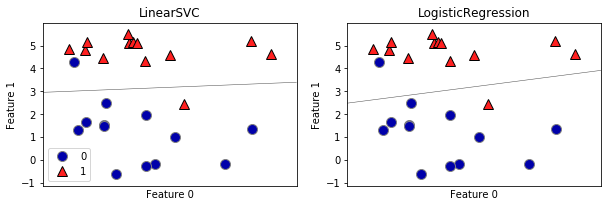

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend();

Both methods can be regularized:
* L2 regularization by default, L1 also possible
* _C_ parameter: inverse of strength of regularization
    * higher _C_: less regularization
    * penalty for misclassifying points while keeping $w_i$ close to 0

High _C_ values (less regularization): fewer misclassifications but smaller margins.

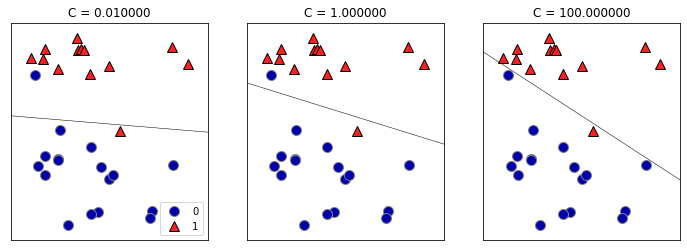

In [20]:
mglearn.plots.plot_linear_svc_regularization()

Model selection: Logistic regression  
`logreg = LogisticRegression(C=1).fit(X_train, y_train)`

Adjust the slider to see the effect of C and L1/L2 regularization

In [21]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_C_train, X_C_test, y_C_train, y_C_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

@interact
def plot_logreg(C=(0.01,100.0,0.1), penalty=['l1','l2']):
    r = LogisticRegression(C=C, penalty=penalty).fit(X_C_train, y_C_train)
    fig, ax = plt.subplots(figsize=(8,2))
    ax.plot(r.coef_.T, 'o')
    ax.set_title("C {}, score {:.2f} (training score {:.2f})".format(C, r.score(X_C_test, y_C_test), r.score(X_C_train, y_C_train)))
    ax.set_xlabel("Coefficient index")
    ax.set_ylabel("Coefficient magnitude")
    ax.hlines(0, 0, len(r.coef_))
    ax.set_ylim(-15, 15)
    ax.set_xlim(0, 30);

interactive(children=(FloatSlider(value=49.910000000000004, description='C', min=0.01), Dropdown(description='…

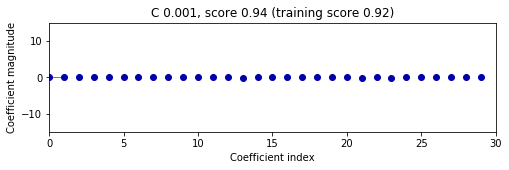

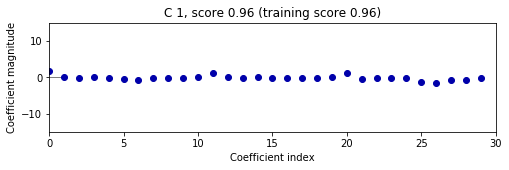

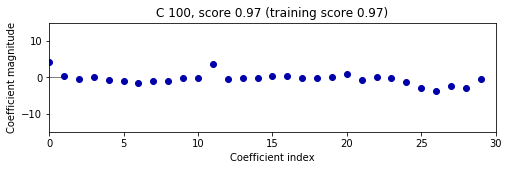

In [22]:
for C in [0.001, 1, 100]:
    plot_logreg(C, 'l2')

# In Practice
* Let's build a simple model for our Iris dataset
* We'll use **scikit-learn**
    * Contains many state-of-the-art machine learning algorithms
    * Offers [comprehensive documentation](http://scikit-learn.org/stable/documentation) about each algorithm
    * Widely used, and a wealth of [tutorials](http://scikit-learn.org/stable/user_guide.html) and code snippets are available 
    * Works well with numpy, scipy, pandas, matplotlib,...

### Data import
Multiple options:

* A few toy datasets are included in `sklearn.datasets`
* Import [1000s of machine learning datasets from OpenML](http://www.openml.org) with `sklearn.datasets.fetch_openml`
* You can import data files (CSV) with `pandas` or `numpy`

Iris is included in scikitlearn, we can just load it.  
This will return a `Bunch` object (similar to a `dict`)

``` python
iris_dataset = load_iris()
print("Keys of iris_dataset: {}".format(iris_dataset.keys()))
print(iris_dataset['DESCR'][:193] + "\n...")
```

In [23]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

print("Keys of iris_dataset: {}".format(iris_dataset.keys()))
print(iris_dataset['DESCR'][:193] + "\n...")

Keys of iris_dataset: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


The targets (classes) and features are stored as `list`s, the data as an `ndarray`

``` python
print("Targets: {}".format(iris_dataset['target_names']))
print("Features: {}".format(iris_dataset['feature_names']))
print("Shape of data: {}".format(iris_dataset['data'].shape))
print("First 5 rows:\n{}".format(iris_dataset['data'][:5]))
```

In [24]:
print("Targets: {}".format(iris_dataset['target_names']))
print("Features: {}".format(iris_dataset['feature_names']))
print("Shape of data: {}".format(iris_dataset['data'].shape))
print("First 5 rows:\n{}".format(iris_dataset['data'][:5]))

Targets: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape of data: (150, 4)
First 5 rows:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


The targets are stored separately as an `ndarray`, with indices pointing to the features

``` python
print("Target names: {}".format(iris_dataset['target_names']))
print("Targets:\n{}".format(iris_dataset['target']))
```

In [25]:
print("Target names: {}".format(iris_dataset['target_names']))
print("Targets:\n{}".format(iris_dataset['target']))

Target names: ['setosa' 'versicolor' 'virginica']
Targets:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Building (fitting) models
All scikit-learn estimators follow the same interface

```python
class SupervisedEstimator(...):
    def __init__(self, hyperparam, ...):

    def fit(self, X, y):   # Fit/model the training data
        ...                # given data X and targets y
        return self
     
    def predict(self, X):  # Make predictions
        ...                # on unseen data X  
        return y_pred
    
    def score(self, X, y): # Predict and compare to true
        ...                # labels y                
        return score
```

### Training and testing data
To evaluate our classifier, we need to test it on unseen data.  
`train_test_split`: splits data randomly in 75% training and 25% test data.

``` python
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)
```

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], 
    random_state=0)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


Note: there are several problems with this approach that we will discuss later:

* Why 75%? Are there better ways to split?
* What if one random split yields  different models than another?
* What if all examples of one class all end up in the training/test set?

### Looking at your data (with pandas)

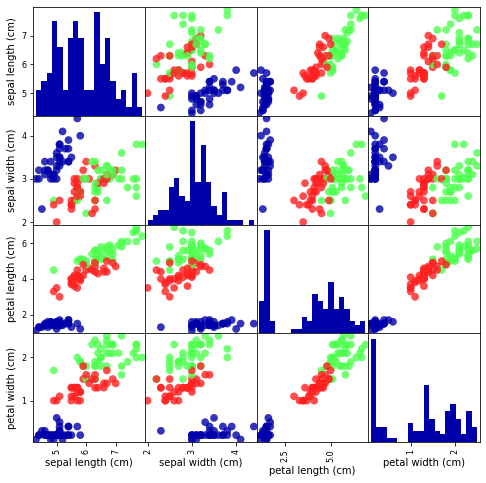

In [27]:
from pandas.plotting import scatter_matrix

# Build a DataFrame with training examples and feature names
iris_df = pd.DataFrame(X_train, 
                       columns=iris_dataset.feature_names)

# scatter matrix from the dataframe, color by class
sm = scatter_matrix(iris_df, c=y_train, figsize=(8, 8), 
                  marker='o', hist_kwds={'bins': 20}, s=60, 
                  alpha=.8, cmap=mglearn.cm3)

### Fitting a model

The first model we'll build is called k-Nearest Neighbor, or kNN. More about that soon.  
kNN is included in `sklearn.neighbors`, so let's build our first model

``` python
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
```

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Making predictions
Let's create a new example and ask the kNN model to classify it

``` python
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
```

In [29]:
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


### Evaluating the model
Feeding all test examples to the model yields all predictions

``` python
y_pred = knn.predict(X_test)
```

In [30]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


We can now just count what percentage was correct, or use `score`

``` python
print("Score: {:.2f}".format(np.mean(y_pred == y_test)))
print("Score: {:.2f}".format(knn.score(X_test, y_test) ))
```

In [31]:
print("Score: {:.2f}".format(np.mean(y_pred == y_test)))
print("Score: {:.2f}".format(knn.score(X_test, y_test) ))

Score: 0.97
Score: 0.97


# k-Nearest Neighbor

* Building the model consists only of storing the training dataset. 
* To make a prediction, the algorithm finds the _k_ closest data points in the training dataset
    * Classification: predict the most frequent class of the k neighbors
    * Regression: predict the average of the values of the k neighbors
    * Both can be weighted by the distance to each neighbor
* Main hyper-parameters:
    * Number of neighbors (k). Acts as a regularizer.
    * Choice of distance function (e.g. Euclidean)
    * Weighting scheme (uniform, distance,...)
* Model:
    - Representation: Store training examples (e.g. in KD-tree)
    - Typical loss functions:
        * Classification: Accuracy (Zero-One Loss)
        * Regression: Root mean squared error
    - Optimization: None (no model parameters to tune)

## k-Nearest Neighbor Classification
for k=1: return the class of the nearest neighbor

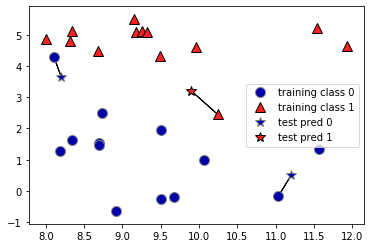

In [32]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

for k>1: do a vote and return the majority (or a confidence value for each class)

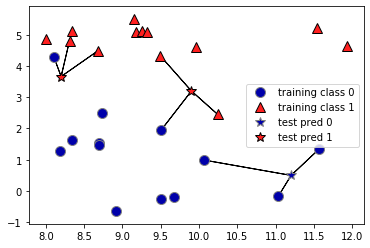

In [33]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Let's build a kNN model for this dataset (called 'Forge')

``` python
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
```

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [35]:
print("Test set accuracy: %.2f" % clf.score(X_test, y_test))

Test set accuracy: 0.86


#### Analysis
We can plot the prediction for each possible input to see the _decision boundary_

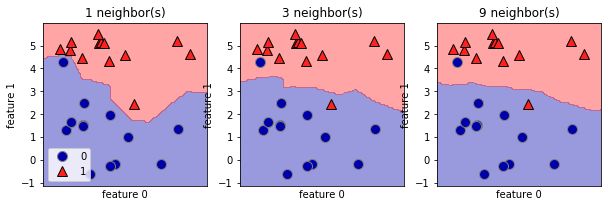

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
_ = axes[0].legend(loc=3)

Using few neighbors corresponds to high model complexity (left), and using many neighbors corresponds to low model complexity and smoother decision boundary (right).

We can more directly measure the effect on the training and test error on a larger dataset (breast_cancer)

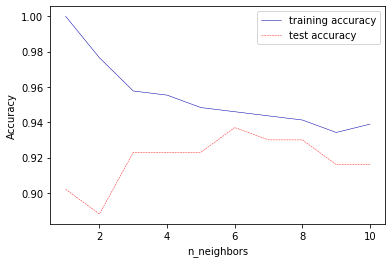

In [37]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# Build a list of the training and test scores for increasing k
training_accuracy = []
test_accuracy = []
k = range(1, 11)

for n_neighbors in k:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # record training and test set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(k, training_accuracy, label="training accuracy")
plt.plot(k, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
_ = plt.legend()

For small numbers of neighbors, the model is too complex, and overfits the training data. As more neighbors are considered, the model becomes simpler and the training accuracy drops, yet the test accuracy increases, up to a point. After about 8 neighbors, the model starts becoming too simple (underfits) and the test accuracy drops again.

## k-Neighbors Regression
for k=1: return the target value of the nearest neighbor

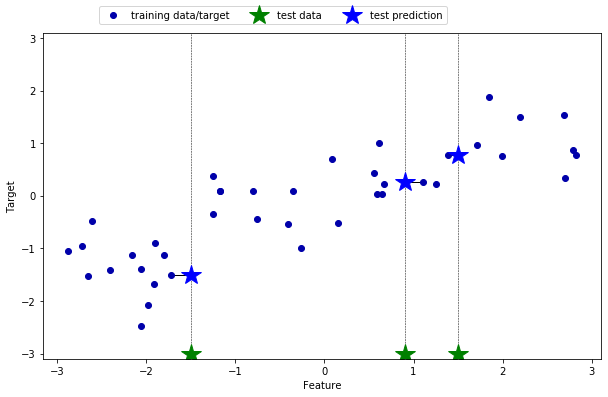

In [38]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

for k>1: return the _mean_ of the target values of the _k_ nearest neighbors

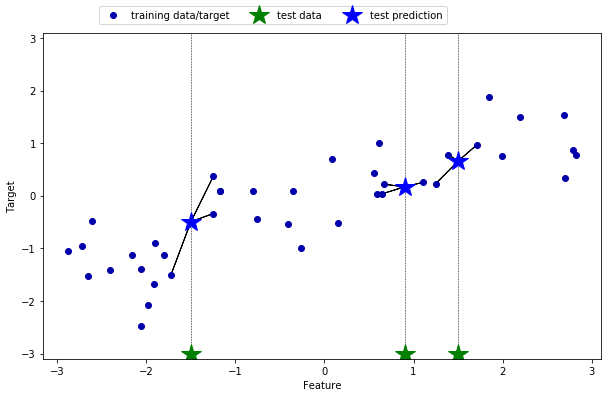

In [39]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

To do regression, simply use `KNeighborsRegressor` instead

``` python
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
```

In [40]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate the model, set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=3)
# Fit the model using the training data and training targets:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

The default scoring function for regression models is $R^{2}$. It will be discussed later. the optimal value is 1. Negative values mean the predictions are worse than just predicting the mean.

In [41]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [42]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


#### Analysis
We can again output the predictions for each possible input, for different values of _k_.

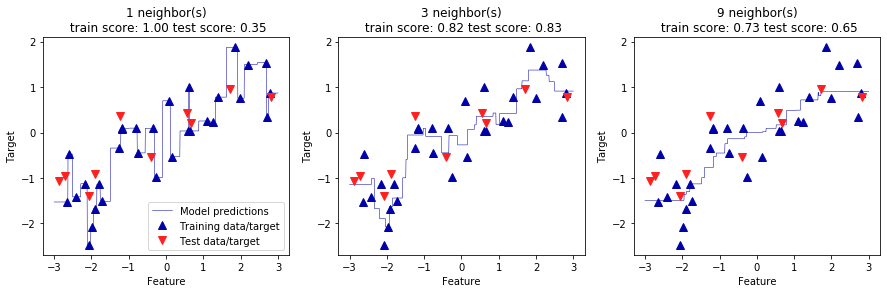

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3 or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
_ = axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

We see that again, a small _k_ leads to an overly complex (overfitting) model, while a larger _k_ yields a smoother fit.

## kNN: Strengths, weaknesses and parameters
* Easy to understand, works well in many settings
* Training is very fast, predicting is slow for large datasets
* Bad at high-dimensional and sparse data (curse of dimensionality)

## Summary

- We've covered the main machine learning concepts
- We used scikit-learn to build a first model
- We met our first algorithm (kNN)